In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [13]:
digits=datasets.load_digits()

In [8]:
X=digits.data  #Training data Image
Y=digits.target #Lebel

In [14]:
print(X.shape)

(1797, 64)


In [21]:
X[32].reshape(8,8) #32nd position of sample leko

array([[ 0.,  2., 13., 16., 16., 16., 11.,  0.],
       [ 0.,  5., 16., 10.,  5.,  4.,  1.,  0.],
       [ 0.,  6., 16.,  7.,  3.,  0.,  0.,  0.],
       [ 0.,  9., 16., 16., 16.,  6.,  0.,  0.],
       [ 0.,  3.,  8.,  4., 11., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16.,  6.,  0.,  0.],
       [ 0.,  2., 16., 15.,  8.,  0.,  0.,  0.]])

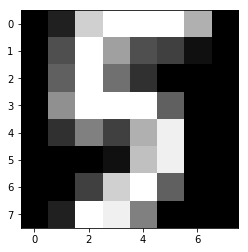

In [18]:
plt.imshow(X[32].reshape(8,8),cmap='gray')

In [22]:
clf=DecisionTreeClassifier()

In [23]:
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

[0 1 2 ... 8 9 8]


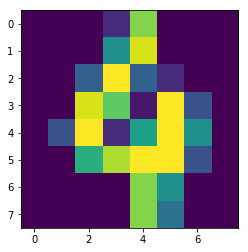

In [34]:
plt.imshow(X[100].reshape(8,8))
print(Y)

In [35]:
clf.predict([X[1773]])

array([6])

In [36]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [38]:
from sklearn.tree import export_graphviz
graph_data=export_graphviz(clf,out_file=None)

In [41]:
print(graph_data)

digraph Tree {
node [shape=box] ;
0 [label="X[36] <= 0.5\ngini = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]"] ;
1 [label="X[28] <= 2.5\ngini = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[21] <= 0.5\ngini = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="X[5] <= 10.0\ngini = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]"] ;
2 -> 3 ;
4 [label="X[29] <= 1.0\ngini = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]"] ;
3 -> 4 ;
5 [label="X[44] <= 8.0\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]"] ;
4 -> 5 ;
6 [label="X[49] <= 4.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"] ;
6 -> 8 ;

In [43]:
from sklearn.model_selection import train_test_split #Sample ko chai sample leko 1700 lai chai 33% chai rakhyo to test

In [45]:
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [50]:
print(len(x_train),len(x_test))

1257 540


In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
y_pred=model.predict(x_test) #model le gareko prediction

In [57]:
accuracy_score(y_test, y_pred) #maile rakheko data anusar ko prediction compare garya

0.8574074074074074

In [59]:
# K-fold cross validation